# Dominos Delivary Analysis

## Importing libraries and data

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time,timedelta

In [171]:
df = pd.read_csv('dominos_data.csv',parse_dates= ['order_placed_at','order_delivered_at'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [173]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


### Question we can extract from our data
1. average number of sales in a day?
2. what is the 95th percentile delivary_time?
3. out of total orders how many are delivered below or equal to 31minutes ?
4. Mean of the delivary_time?
7. max,min sales day of data?
5. which dayof week has more number of sales?
6. at which time of the day sales are high/peak hours?

In [174]:
df['order_placed_at'].min()


Timestamp('2023-03-01 00:00:59')

In [175]:
print('The data is from ',df['order_placed_at'].min(),'to',df['order_placed_at'].max())

The data is from  2023-03-01 00:00:59 to 2023-03-27 23:58:20


In [176]:
df['order_placed_at'][0]

Timestamp('2023-03-01 00:00:59')

> **It is the data of 27days in march from 1st to 27th day.**

In [177]:
np.floor((len(df)/27))

555.0

### <span style="color:green">Average number of sales in a day is 555</span>


In [178]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

## Feature Engineering

In [179]:
df['delivary_time'] = np.floor((df['order_delivered_at'] - df['order_placed_at'])/timedelta(minutes = 1))
df.head()

,order_id,order_placed_at,order_delivered_at,delivary_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.0


In [180]:
df['delivary_time'].mean()

20.088666666666665

### <span style="color:green">Mean of the delivary_time is 20.08 minutes</span>


In [181]:
np.percentile(df['delivary_time'],95)

27.0

### <span style="color:green">27minutes is the 95th percentile delivary_time</span>


In [182]:
print('Number of late delivaries are',df[df['delivary_time']>31.0]['order_id'].count(),'percentage is:',np.round(df[df['delivary_time']>31.0]['order_id'].count()/len(df),2)*100)
print('Number of Fast delivaries are',df[df['delivary_time']<=31.0]['order_id'].count(),'percentage is:',np.round(df[df['delivary_time']<=31.0]['order_id'].count()/len(df),2)*100)

Number of late delivaries are 517 percentage is: 3.0
Number of Fast delivaries are 14483 percentage is: 97.0


### <span style="color:green">Number of late delivaries are 517 percentage is: 3%</span>
### <span style="color:green">Number of Fast delivaries are 14483 percentage is: 97%</span>

In [183]:
# function to extract date and time from our data
def extractdatetime(feature,data):
    data[str(feature)+'_date'] = data[str(feature)].apply(lambda x: x.date()) 
    data[str(feature)+'_dayofweek'] = data[str(feature)].apply(lambda x: x.strftime('%A'))
    data[str(feature)+'_hour'] = data[str(feature)].apply(lambda x : x.hour)

In [184]:
extractdatetime('order_placed_at',df)

In [185]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivary_time,order_placed_at_date,order_placed_at_dayofweek,order_placed_at_hour
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.0,2023-03-01,Wednesday,0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.0,2023-03-01,Wednesday,0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.0,2023-03-01,Wednesday,0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.0,2023-03-01,Wednesday,0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.0,2023-03-01,Wednesday,0


In [186]:
print(df.groupby(by = ['order_placed_at_date'])['order_id'].count().idxmax(),df.groupby(by = ['order_placed_at_date'])['order_id'].count().max())
print(df.groupby(by = ['order_placed_at_date'])['order_id'].count().idxmin(),df.groupby(by = ['order_placed_at_date'])['order_id'].count().min())

2023-03-20 597
2023-03-14 492


### <span style="color:green">3rd of march is having the maximum delivaries,597</span>
### <span style="color:green">14th of march is having the minimum delivaries,492</span>

In [187]:
print(df.groupby(by = ['order_placed_at_dayofweek'])['order_id'].count().idxmax(),df.groupby(by = ['order_placed_at_dayofweek'])['order_id'].count().max())
print(df.groupby(by = ['order_placed_at_dayofweek'])['order_id'].count().idxmin(),df.groupby(by = ['order_placed_at_dayofweek'])['order_id'].count().min())

Thursday 2280
Tuesday 1582


### <span style="color:green">Thursday is having the maximum delivaries,2280</span>
### <span style="color:green">Tuesday  is having the minimum delivaries,1582</span>

<AxesSubplot:xlabel='order_placed_at_hour'>

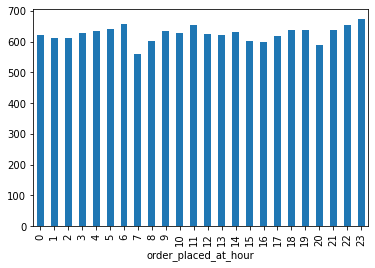

In [188]:
df.groupby(by = ['order_placed_at_hour'])['order_id'].count().plot(kind = 'bar')

### From above we can say at mid night maximum sales are happening

In [189]:
print(df.groupby(by = ['order_placed_at_hour'])['order_id'].count().argmax(),df.groupby(by = ['order_placed_at_hour'])['order_id'].count().max())

23 673


### <span style="color:green">max sales are at midnight</span>
### <span style="color:green">min sales are at morning(6-10 AM)</span>